<a href="https://colab.research.google.com/github/unicamp-dl/IA025_2022S1/blob/main/Final_project/Larissa_Santesso/entrega_final/run01_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#!pip install import-ipynb
#import import_ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#!cd /content/gdrive/MyDrive/Colab\ Notebooks/Projeto/

In [ ]:
#!ls

'Apresentação de Projetos Finais - Larissa Santesso.gslides'
 arquiteturas_backup
 backup
 backup2
 checkpoints
 dataset
 modelos
 others
 run00_dataset.ipynb
 run01_Metrics.ipynb
 ViT_T5base_dsetComplete_exp001.ipynb


importing Jupyter notebook from run00_dataset.ipynb
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.

Using cpu
Archive:  /content/gdrive/MyDrive/Colab Notebooks/Projeto/dataset/annotations_trainval2014.zip
  inflating: /content/annotations/instances_train2014.json  
  inflating

/usr/local/lib/python3.7/dist-packages/transformers/models/t5/tokenization_t5.py:174: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  FutureWarning,


loading annotations into memory...
Done (t=1.25s)
creating index...
index created!
loading annotations into memory...
Done (t=0.40s)
creating index...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


index created!
Number of samples in training dataset: 82783
Number of samples in eval dataset (original validation set): 40504
Number of samples in validation dataset: 24302
Number of samples in test dataset: 16202
--------------------
Outputs of CocoDataset: 
Image with a shape of: torch.Size([3, 224, 224])
Image captions: 
Closeup of bins of food that include broccoli and bread.
A meal is presented in brightly colored plastic trays.
there are containers filled with different kinds of foods
Colorful dishes holding meat, vegetables, fruit, and bread.
A bunch of trays that have different food.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


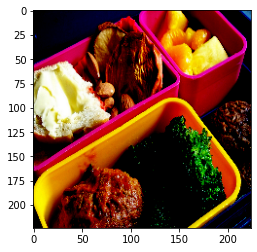

In [ ]:
from run00_dataset import *

# Metrics


In [ ]:
bleu = datasets.load_metric('sacrebleu')

def calculate_metrics(preds, refs):

    bleu_score = bleu.compute(predictions=preds, references=refs)
    bleu1 = bleu_score['bp']*math.exp(math.log(bleu_score['precisions'][0]))
    bleu2 = bleu_score['bp']*math.exp(0.5*math.log(bleu_score['precisions'][0])+0.5*math.log(bleu_score['precisions'][1]))
    bleu3 = bleu_score['bp']*math.exp((1/3)*math.log(bleu_score['precisions'][0])+(1/3)*math.log(bleu_score['precisions'][1])+ (1/3)*math.log(bleu_score['precisions'][2]))
    bleu4 = bleu_score["score"]

    return bleu1, bleu2, bleu3, bleu4

## Examples

In [ ]:
#train_loader_test = DataLoader(train_dataset, batch_size=3, shuffle=False, collate_fn = collate_custom, drop_last=True)

#x, y, z, w  = next(iter(train_loader_test))

In [ ]:
#z

[['A bunch of trays that have different food.',
  'A meal is presented in brightly colored plastic trays.',
  'there are containers filled with different kinds of foods',
  'Closeup of bins of food that include broccoli and bread.',
  'Colorful dishes holding meat, vegetables, fruit, and bread.'],
 ['A giraffe mother with its baby in the forest.',
  'A giraffe eating food from the top of the tree.',
  'A giraffe standing next to a forest filled with trees.',
  'Two giraffes standing in a tree filled area.',
  'A giraffe standing up nearby a tree '],
 ['A white vase filled with different colored flowers.',
  'a white vase with many flowers on a stage',
  'A vase with red and white flowers outside on a sunny day.',
  'White vase with different colored flowers sitting inside of it. ',
  'A flower vase is sitting on a porch stand.']]

In [ ]:
#predictions = ['Closeup of bins of food that include broccoli and bread.',
#                'A giraffe eating food from the top of the tree.',
#                'A cat']

#predictions

['Closeup of bins of food that include broccoli and bread.',
 'A giraffe eating food from the top of the tree.',
 'A cat']

In [ ]:
#predictions2 = ['A woman riding a pink bike.',
#                'A group of people around a tree.',
#                'A large boat filled with water.']

In [ ]:
#calculate_metrics(predictions, z)

(71.5891771130831, 71.3665041720729, 72.46137006188123, 73.01508580595927)

In [ ]:
#calculate_metrics(predictions2, z)

(43.62626464347118, 24.515844286429935, 11.789822095616621, 7.241426204102065)